# Quiz 3 

#### Name : Aashi Agarwal
Regnumber : 18125760001

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

# decision tree

In [4]:
data= pd.read_csv('https://raw.githubusercontent.com/skathirmani/datasets/master/credit-default.csv')
data_dummies = pd.get_dummies(data)


train, test = train_test_split(data_dummies,
                               test_size=0.3,
                               random_state=100)

In [6]:
def draw_tree(model, columns):
    import pydotplus
    from sklearn.externals.six import StringIO
    from IPython.display import Image
    import os
    from sklearn import tree
    
    graphviz_path = 'C:\Program Files (x86)\Graphviz2.38/bin/'
    os.environ["PATH"] += os.pathsep + graphviz_path

    dot_data = StringIO()
    tree.export_graphviz(model,
                         out_file=dot_data,
                         feature_names=columns)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

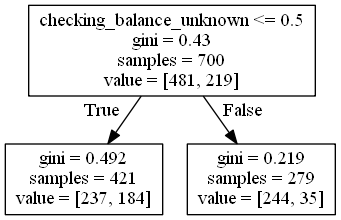

In [9]:
train_x = train.drop('default', axis=1)
train_y = train['default']

test_x = test.drop('default', axis=1)
test_y = test['default']

model = DecisionTreeClassifier(random_state=100, max_depth=1)
model.fit(train_x, train_y)
draw_tree(model, train_x.columns)

In [12]:
pred_test = model.predict(test_x)
pred_results = pd.DataFrame({
    'actual': test_y,
    'predicted': pred_test
})
#(pred_results['actual'] == pred_results['predicted']).sum() / test.shape[0]

from sklearn.metrics import accuracy_score
accuracy_score(pred_results['actual'], pred_results['predicted'])

0.73

In [19]:
#true positive
print(pred_results[(pred_results['predicted']==1) & 
             (pred_results['actual']==1)].shape)
### True Negative
print(pred_results[(pred_results['predicted']==0) & 
             (pred_results['actual']==0)].shape)
### False Positive
print(pred_results[(pred_results['predicted']==1) & 
             (pred_results['actual']==0)].shape)
### False Negative
print(pred_results[(pred_results['predicted']==0) & 
             (pred_results['actual']==1)].shape)

(219, 2)
(0, 2)
(0, 2)
(0, 2)


## with hyper parameter tunning

In [20]:
depths = []
train_errors = []
test_errors = []
for depth in range(1, 30):
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(train_x, train_y)
    train_predict_class = model.predict(train_x)
    test_predict_class = model.predict(test_x)
    train_error = 1 - accuracy_score(train_y, train_predict_class)
    test_error = 1 - accuracy_score(test_y, test_predict_class)  
    depths.append(depth)
    train_errors.append(train_error)
    test_errors.append(test_error)

In [23]:
import matplotlib.pyplot as plt
plt.plot(depths, train_errors)
plt.plot(depths, test_errors)
plt.legend(['Train Errors', 'Test Errors'])
plt.xlabel('Decision Tree Depth')
plt.ylabel('Error rate')

Text(0,0.5,'Error rate')

In [24]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': list(range(1,30)),
          'criterion': ['gini', 'entropy']}
base_estimator = DecisionTreeClassifier(random_state=100)
cv_model = GridSearchCV(base_estimator,
                        param_grid=params,
                        cv=10,
                       scoring='f1')
cv_model.fit(train_x, train_y)
  

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [25]:
cv_model.best_params_

{'criterion': 'gini', 'max_depth': 4}

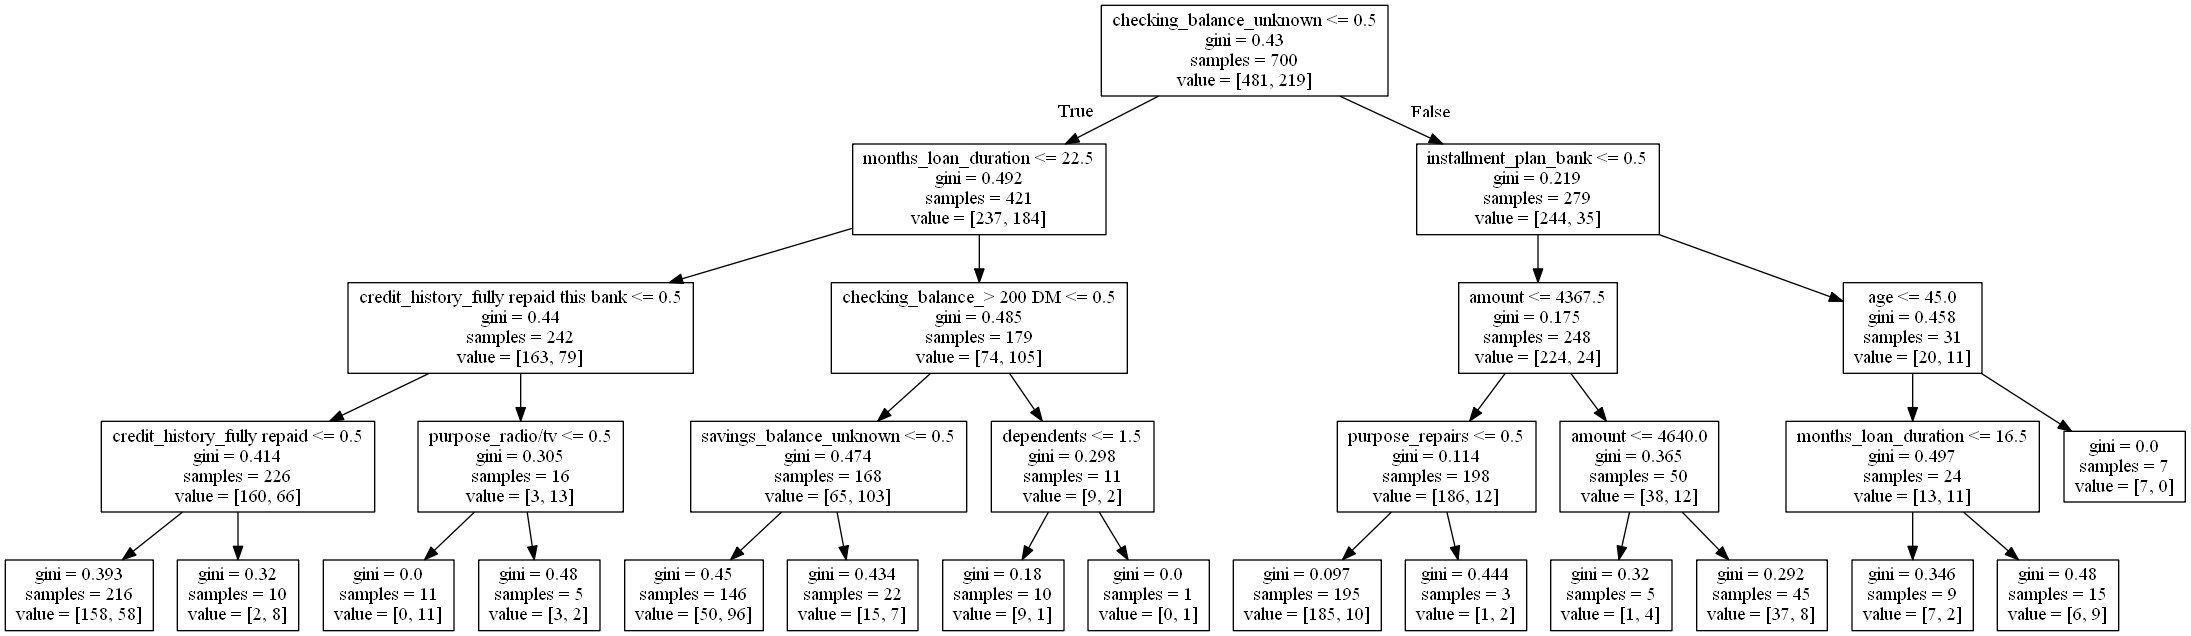

In [68]:
train_x = train.drop('default', axis=1)
train_y = train['default']

test_x = test.drop('default', axis=1)
test_y = test['default']

model_dnew = DecisionTreeClassifier(random_state=100, max_depth=4)
model_dnew.fit(train_x, train_y)
draw_tree(model_dnew, train_x.columns)

In [69]:
pred_test = model_dnew.predict(test_x)

#(pred_results['actual'] == pred_results['predicted']).sum() / test.shape[0]

from sklearn.metrics import accuracy_score
print(accuracy_score(test_y,pred_test))
print(classification_report(test_y,pred_test))


pred_probs_dt = pd.DataFrame(model.predict_proba(test_x),
                          columns=['Pos','Neg'])
fpr_dt_5,tpr_dt_5,thr_dt_5 = roc_curve(test_y,pred_probs_dt['Pos'],pos_label=1)

0.6966666666666667
              precision    recall  f1-score   support

           1       0.78      0.81      0.80       219
           2       0.43      0.40      0.41        81

   micro avg       0.70      0.70      0.70       300
   macro avg       0.61      0.60      0.60       300
weighted avg       0.69      0.70      0.69       300



# Random forest

In [56]:
model_rf = RandomForestClassifier(random_state = 100,
                                 n_estimators = 300)
model_rf.fit(train_x, train_y)
pred = model_rf.predict(test_x)
print(accuracy_score(test_y,pred))
print(classification_report(test_y, pred))

pred_probs_rf = pd.DataFrame(model_rf.predict_proba(test_x),
                          columns=['Pos','Neg'])
fpr_rf_5,tpr_rf_5,thr_rf_5 = roc_curve(test_y,pred_probs_rf['Pos'],pos_label=1)

0.7333333333333333
              precision    recall  f1-score   support

           1       0.78      0.88      0.83       219
           2       0.51      0.33      0.40        81

   micro avg       0.73      0.73      0.73       300
   macro avg       0.65      0.61      0.62       300
weighted avg       0.71      0.73      0.71       300



# adaboost

In [57]:
model_ab = AdaBoostClassifier(random_state=100,n_estimators=300)
model_ab.fit(train_x,train_y)
pred_test = model_ab.predict(test_x)
print(accuracy_score(test_y,pred_test))
print(classification_report(test_y,pred_test))
pred_probs_ab = pd.DataFrame(model_ab.predict_proba(test_x),
                          columns=['Pos','Neg'])
fpr_ab_5,tpr_ab_5,thr_ab_5 = roc_curve(test_y,pred_probs_ab['Pos'],pos_label=1)

0.6933333333333334
              precision    recall  f1-score   support

           1       0.78      0.81      0.79       219
           2       0.42      0.37      0.39        81

   micro avg       0.69      0.69      0.69       300
   macro avg       0.60      0.59      0.59       300
weighted avg       0.68      0.69      0.69       300



# knn

In [58]:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(train_x, train_y)
pred_class = model_knn.predict(test_x)
pred_probs = pd.DataFrame(model.predict_proba(test_x),
                         columns=['Neg', 'Pos'])
print('Accuracy: %.2f' % accuracy_score(test_y, pred_class))
print(classification_report(test_y, pred_class))

pred_probs_knn = pd.DataFrame(model_knn.predict_proba(test_x),
                          columns=['Pos','Neg'])
fpr_knn_5,tpr_knn_5,thr_knn_5 = roc_curve(test_y,pred_probs_knn['Pos'],pos_label=1)

Accuracy: 0.68
              precision    recall  f1-score   support

           1       0.75      0.84      0.79       219
           2       0.35      0.23      0.28        81

   micro avg       0.68      0.68      0.68       300
   macro avg       0.55      0.54      0.54       300
weighted avg       0.64      0.68      0.65       300



# naive bayes

In [65]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(train_x, train_y)
cl=model_nb.predict(test_x)

print(accuracy_score(test_y,cl))
print(classification_report(test_y, cl))

pred_probs_nb = pd.DataFrame(model_nb.predict_proba(test_x),
                          columns=['Pos','Neg'])
fpr_nb_5,tpr_nb_5,thr_nb_5 = roc_curve(test_y,pred_probs_nb['Pos'],pos_label=1)

0.6833333333333333
              precision    recall  f1-score   support

           1       0.81      0.74      0.77       219
           2       0.43      0.54      0.48        81

   micro avg       0.68      0.68      0.68       300
   macro avg       0.62      0.64      0.63       300
weighted avg       0.71      0.68      0.69       300



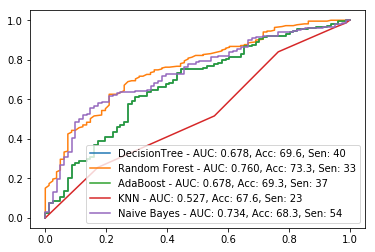

In [67]:
from sklearn.metrics import auc
auc_dt_5 = auc(fpr_dt_5,tpr_dt_5)
auc_rf_5 = auc(fpr_rf_5,tpr_rf_5)
auc_ab_5 = auc(fpr_ab_5,tpr_ab_5)
auc_knn_5 = auc(fpr_knn_5,tpr_knn_5)
auc_nb_5 = auc(fpr_nb_5,tpr_nb_5)
plt.plot(fpr_dt_5,tpr_dt_5)
plt.plot(fpr_rf_5,tpr_rf_5)
plt.plot(fpr_ab_5,tpr_ab_5)
plt.plot(fpr_knn_5,tpr_knn_5)
plt.plot(fpr_nb_5,tpr_nb_5)
plt.legend((['DecisionTree - AUC: %.3f, Acc: 69.6, Sen: 40' % auc_dt_5,
            'Random Forest - AUC: %.3f, Acc: 73.3, Sen: 33' % auc_rf_5,
            'AdaBoost - AUC: %.3f, Acc: 69.3, Sen: 37' % auc_ab_5,
            'KNN - AUC: %.3f, Acc: 67.6, Sen: 23' % auc_knn_5,
            'Naive Bayes - AUC: %.3f, Acc: 68.3, Sen: 54' % auc_nb_5]))

### Random Forest is the best model to choosing as it is giving the best accuracy i.e.73.3 and maximum area under the curve(auc=0.76)